## DATA CLEANING

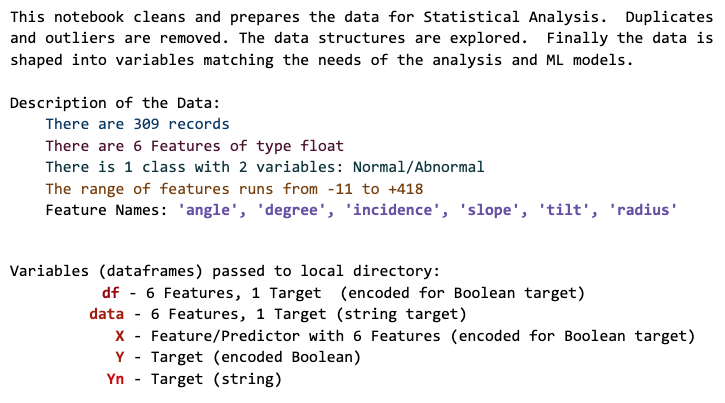

In [9]:
from IPython.display import Image
Image(filename='images/12.12.png')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and Explore the Data


In [3]:
data = pd.read_csv('Data/weka2c.csv')         # import file

data.info()                                   # Explore
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### rename columns, and drop rows with null values

In [4]:
data = data.rename(columns = {'pelvic_incidence':'incidence', 'pelvic_tilt numeric': 'tilt',
                           'lumbar_lordosis_angle': 'angle', 'sacral_slope': 'slope',
                           'pelvic_radius': 'radius', 'degree_spondylolisthesis' : 'degree',
                            'class':'class'}).dropna()
df = data.copy(deep=True)

In [5]:
print(df.nunique())             # just interesting stat to see 4 features have completely unique values

incidence    310
tilt         310
angle        280
slope        281
radius       310
degree       310
class          2
dtype: int64


In [6]:
data["class"].value_counts()   # Count Class targets

Abnormal    210
Normal      100
Name: class, dtype: int64

#### Encode target variables as boolean - required for some models

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()                            # create Encoder

df.iloc[:,6] = label_encoder.fit_transform(df.iloc[:,6])  # encode class as boolean
df.iloc[:,6] = np.ravel(df.iloc[:,6])                     # reshapes appropriately

#### Create the predictor features dataframe called "X"

In [8]:
X = df.drop(['class'],axis=1).copy(deep=True)             # create predictor variable (features)
print(X)

     incidence       tilt      angle      slope      radius     degree
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501
..         ...        ...        ...        ...         ...        ...
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249

[310 rows x 6 columns]


#### Quick plot of the shape of the data displays an obvious outlier in the 'degree' feature >360 degrees

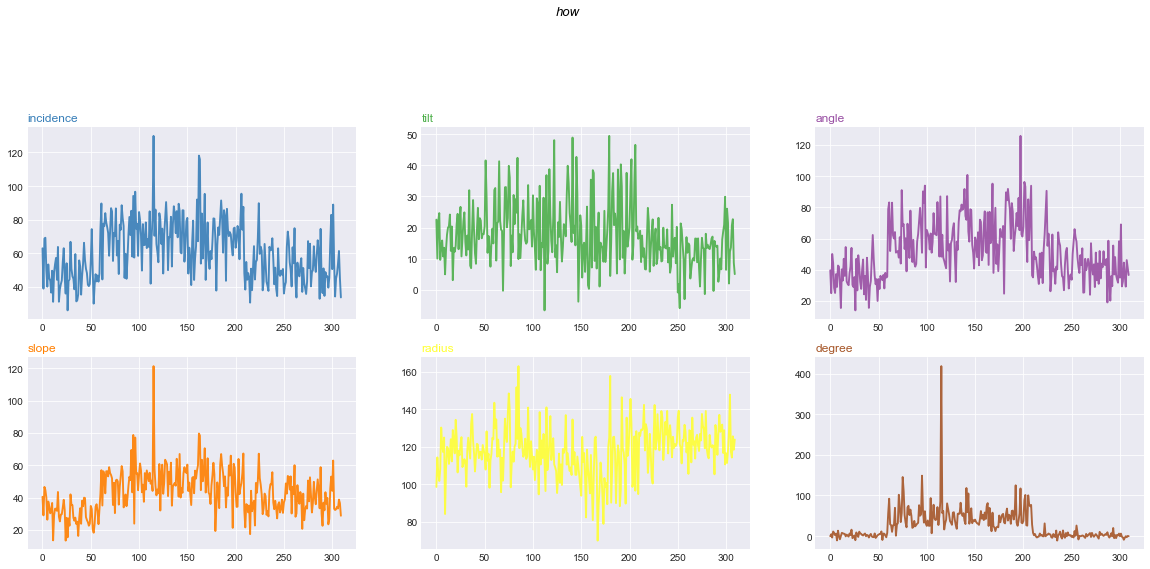

In [9]:
plt.figure(figsize = (20,12))
def feature_plt(P):
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    num = 0
    for column in P:
        num+=1
        plt.subplot(3,3, num)
        plt.plot(P[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    
        if num in range(7) :
            plt.tick_params(labelbottom='off')
        if num not in [1,4,7] :
            plt.tick_params(labelleft='off')
    
        plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

    plt.suptitle("how", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
feature_plt(X)

#### Take a closer look at 'degree'

<AxesSubplot:ylabel='degree'>

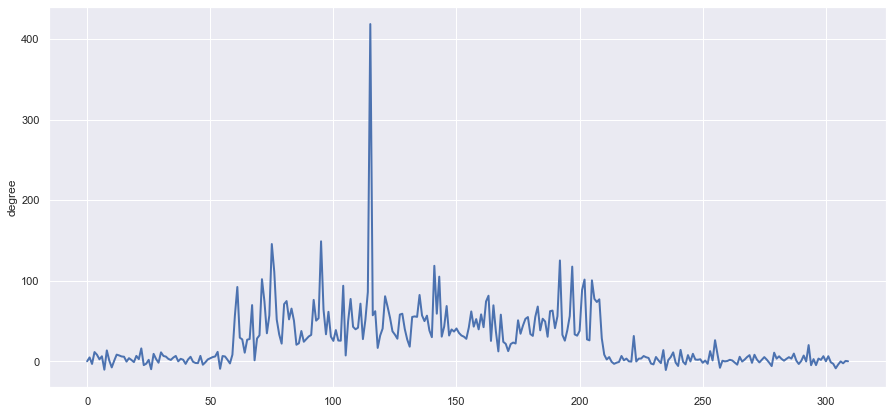

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=X['degree'], palette="tab10", linewidth=2)

#### Look for Outliers to remove using Tukey

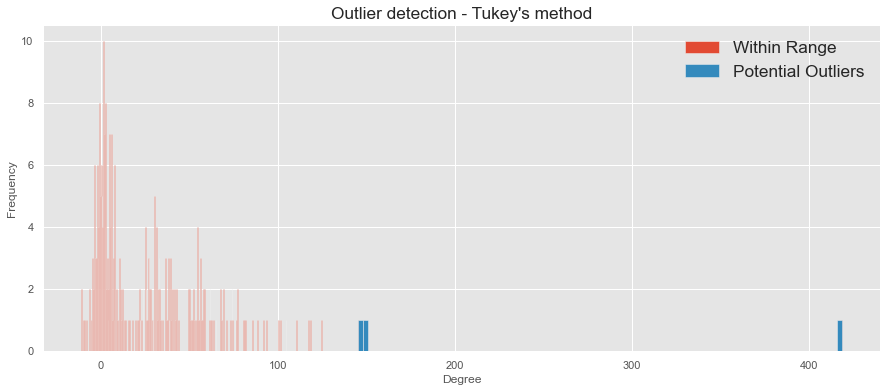

In [11]:
# Detect outliers on degree_spondylolisthesis dataset
# Funciton for detecting ouliers a la Turkey's method using z-score
plt.style.use('ggplot')
def tukey_outliers(data) -> list:
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers
spond_outliers = tukey_outliers(data['degree'])

plt.figure(figsize=(15,6))
data['degree'].plot(kind='hist', bins=1000, label='Within Range')
plt.hist(spond_outliers, bins = 100, label='Potential Outliers')
plt.title("Outlier detection - Tukey's method", fontsize='xx-large')
plt.xlabel('Degree')
plt.legend(fontsize='xx-large')

In [12]:
# remove the oulier, values > 360
X = X.loc[X['degree'] <= 360]               # Predictor variables
df = df.loc[df['degree'] <= 360]            # Ecoded/boolean dataframe
data = data.loc[data['degree'] <= 360]      # non-Encoded dataframe

print(X.count(),df.count(),data.count())    # We can see the outliers have been removed

incidence    309
tilt         309
angle        309
slope        309
radius       309
degree       309
dtype: int64 incidence    309
tilt         309
angle        309
slope        309
radius       309
degree       309
class        309
dtype: int64 incidence    309
tilt         309
angle        309
slope        309
radius       309
degree       309
class        309
dtype: int64


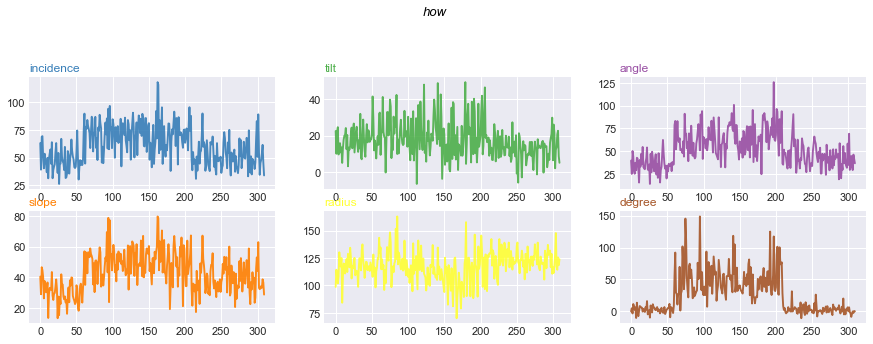

In [13]:
feature_plt(X)    # And looking at the distributions of the features, we see the removal reduced noise

#### Create the Target (Y1) Variables now that we have cleaned the data

In [14]:
Y = df[['class']]                      # Encoded Target
Yn = data[['class']]                   # non-Encoded Target
Xn = data.drop(['class'], axis=1)      # non-Encoded Predictor Variables/Features

In [16]:
# save feature frames for Machine Learning notebook

data.to_csv('Data/data.csv',index=False)
df.to_csv('Data/df.csv',index=False)
X.to_csv('Data/X.csv',index=False)

Y.to_csv('Data/Y.csv',index=False)
Xn.to_csv('Data/Xn.csv',index=False)
Yn.to_csv('Data/Yn.csv',index=False)
